### Read the data

In [1]:
import numpy as np
import os
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
path = './data/'

dir_list = []
for dir in sorted(os.listdir(path)):
    if dir == 'E059':
        continue
    dir_list.append(dir)

print("Number of cell lines:", len(dir_list))

Number of cell lines: 55


In [3]:
csv_files = []

for d in dir_list:
    for file in os.listdir(os.path.join(path, d, 'classification')):
        if file.endswith("test.csv"):
            csv_files.append(os.path.join(path, d, 'classification', file))
csv_files = sorted(csv_files)
print(csv_files)

['./data/E003/classification/test.csv', './data/E004/classification/test.csv', './data/E005/classification/test.csv', './data/E006/classification/test.csv', './data/E007/classification/test.csv', './data/E011/classification/test.csv', './data/E012/classification/test.csv', './data/E013/classification/test.csv', './data/E016/classification/test.csv', './data/E024/classification/test.csv', './data/E027/classification/test.csv', './data/E028/classification/test.csv', './data/E037/classification/test.csv', './data/E038/classification/test.csv', './data/E047/classification/test.csv', './data/E050/classification/test.csv', './data/E053/classification/test.csv', './data/E054/classification/test.csv', './data/E055/classification/test.csv', './data/E056/classification/test.csv', './data/E057/classification/test.csv', './data/E058/classification/test.csv', './data/E061/classification/test.csv', './data/E062/classification/test.csv', './data/E065/classification/test.csv', './data/E066/classificat

In [4]:
dfs = []
for csv_input in tqdm_notebook(csv_files):
    df = pd.read_csv(csv_input, header=None, names=['gene_id', 'box_no', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'gene_exp'])
    dfs.append(df)
    
dfs[0].head()

<ipython-input-4-af819a892a44>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for csv_input in tqdm_notebook(csv_files):


,gene_id,box_no,HM1,HM2,HM3,HM4,HM5,gene_exp
0,172936,1,0,6,1,2,0,0
1,172936,2,0,10,1,0,2,0
2,172936,3,0,12,1,0,3,0
3,172936,4,0,13,0,2,2,0
4,172936,5,0,4,0,4,4,0


### Compute basic statistics of test data set distribution

In [5]:
THRESHOLD = 10
hms = ['HM1', 'HM2', 'HM3', 'HM4', 'HM5']

test_data_stats = []
col_names = ['mean', 'median', 'std', 'peak bins', 'peak mean', 'peak median', 'peak std', 'non-peak bins', 'non-peak mean', 'non-peak median', 'non-peak std']

for i in tqdm_notebook(range(len(dfs))):
    indiv_hm_stats = []
    for hm in hms:
        indiv_hm_stats.append([
            np.mean(dfs[i][hm]),
            np.median(dfs[i][hm]),
            np.std(dfs[i][hm]),
            len(dfs[i][dfs[i][hm] > THRESHOLD][hm]),
            np.mean(dfs[i][dfs[i][hm] > THRESHOLD][hm]),
            np.median(dfs[i][dfs[i][hm] > THRESHOLD][hm]),
            np.std(dfs[i][dfs[i][hm] > THRESHOLD][hm]),
            len(dfs[i][dfs[i][hm] <= THRESHOLD][hm]),
            np.mean(dfs[i][dfs[i][hm] <= THRESHOLD][hm]),
            np.median(dfs[i][dfs[i][hm] <= THRESHOLD][hm]),
            np.std(dfs[i][dfs[i][hm] <= THRESHOLD][hm])
        ])
    test_data_stats.append(np.mean(indiv_hm_stats, axis=0))
    
test_data_stats_df = pd.DataFrame(test_data_stats, index=dir_list, columns=col_names)
test_data_stats_df

<ipython-input-5-36a551c47d64>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(dfs))):


,mean,median,std,peak bins,peak mean,peak median,peak std,non-peak bins,non-peak mean,non-peak median,non-peak std
E003,5.484769,1.2,15.507620,37278.0,39.006186,27.2,33.869986,622722.0,1.618300,1.2,2.007220
E004,2.761825,1.2,5.020469,21781.6,20.777679,17.0,10.797217,638218.4,1.758592,1.2,1.938616
E005,3.950578,1.2,9.607805,35283.0,25.658838,16.8,22.488394,624717.0,1.956130,1.2,2.305257
E006,3.237119,1.2,7.705272,29857.6,24.743999,18.4,16.365018,630142.4,1.701708,0.8,2.164047
E007,3.027588,1.2,6.278475,19867.4,21.852160,16.0,21.750550,640132.6,1.866372,1.2,2.061174
E011,3.172617,1.0,7.064470,33101.4,22.929645,18.4,13.237070,626898.6,1.422560,0.8,2.013066
E012,2.942368,0.0,8.424167,24964.2,29.915923,23.4,20.800188,635035.8,0.936230,0.0,1.554418
E013,2.527988,0.2,7.465213,19637.4,25.060735,20.8,15.003013,640362.6,0.784465,0.0,1.556810
E016,5.686995,1.2,15.421433,40979.2,37.395298,26.8,28.819757,619020.8,1.386786,0.8,1.975073
E024,3.176937,1.2,6.739190,28115.2,23.551675,19.0,14.200077,631884.8,1.699502,1.2,2.028421


### Plot input data statistics against adversarial attack effectiveness

['Results_all_fgsm', 'Results_baseline']
[[0.5368673  0.55877938 0.38333581 0.34058819 0.4462877  0.51456418
  0.51451346 0.39256793 0.58863897 0.40332773 0.61273897 0.52448245
  0.20901999 0.34704435 0.1813119  0.54951001 0.57675292 0.45263867
  0.59388417 0.5977534  0.51171035 0.59041053 0.51098142 0.43817805
  0.13717417 0.48354673 0.46196844 0.24794262 0.39375271 0.57836111
  0.51128983 0.51880611 0.49377545 0.00296722 0.54360908 0.36748282
  0.34299868 0.06873878 0.25964231 0.15417976 0.20423145 0.31192641
  0.19009256 0.48995177 0.2742572  0.59282319 0.68695215 0.58981167
  0.50421123 0.55254679 0.54558942 0.47279435 0.36853656 0.53056391
  0.57962647]
 [0.78588151 0.82002698 0.83222031 0.82603848 0.79552871 0.77265367
  0.79749978 0.80797586 0.79326859 0.78040484 0.81772372 0.82008133
  0.82932522 0.83500534 0.84045673 0.80555015 0.80680425 0.80443206
  0.84527457 0.9021919  0.8953436  0.84263581 0.84365521 0.8252035
  0.77376688 0.81514656 0.77344462 0.74322697 0.75238551 0.796

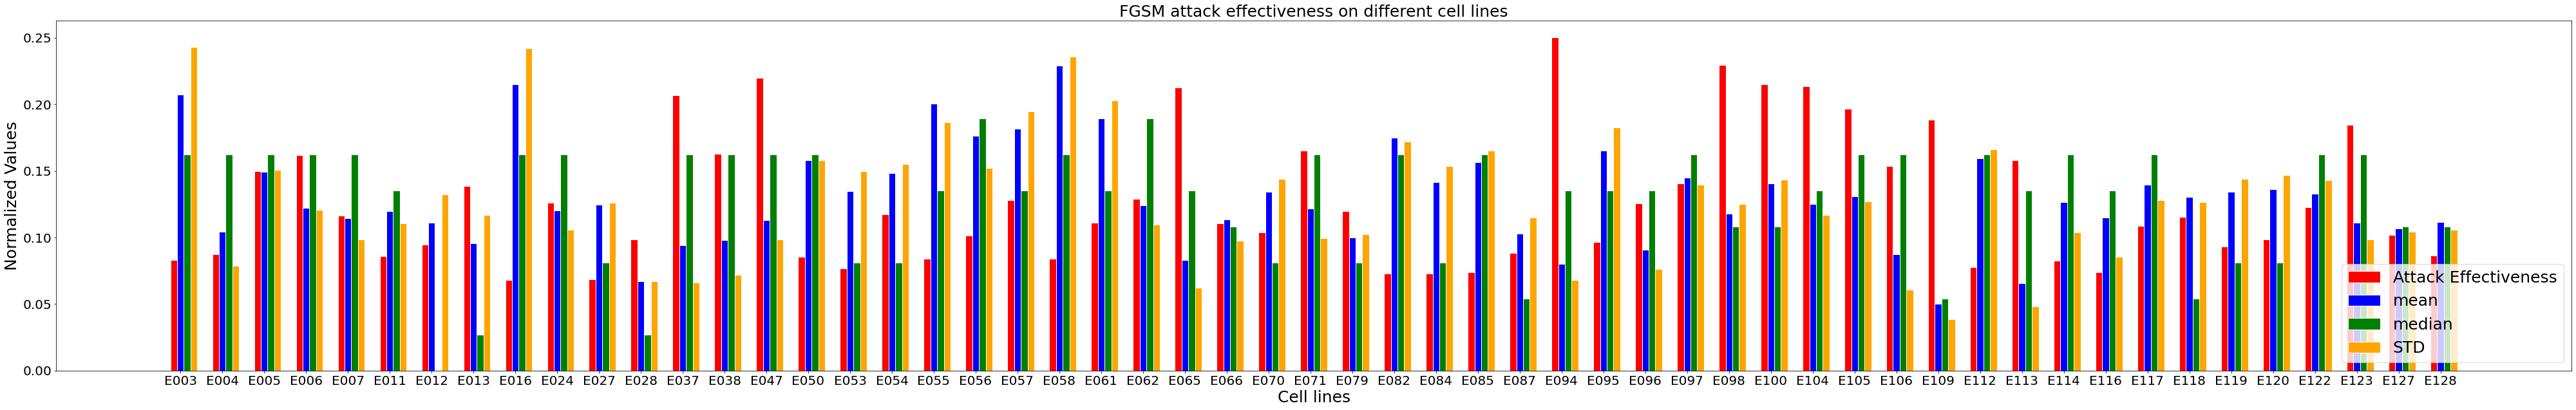

In [8]:
# load the adversarial attack effectiveness data here
result_list = []
dir_list = []
for dir in sorted(os.listdir('./')):
  if ('Results_baseline' == dir) or ('Results_all_fgsm' == dir):
    try:
      result_list.append(np.load(os.path.join(dir, 'E128total_auc.npy')))
      dir_list.append(dir)
    except Exception as e:
      print(e)

print(dir_list)
    
result_list = np.array(result_list)

print(result_list)

# calculate attack effectivenesss (AUC Drop)
atk_eff = result_list[1] - result_list[0]

# plot normalized attack effectiveness vs normalized test data statistics
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

things_to_plot = ([normalize(atk_eff),
                   normalize(test_data_stats_df['mean']), 
                   normalize(test_data_stats_df['median']),
                   normalize(test_data_stats_df['std'])
                  ])
labels_to_plot = ['Attack Effectiveness', 'mean', 'median', 'STD']

cell_lines = list(os.listdir('./data/'))
cell_lines.remove('E059')
cell_lines =  np.sort(cell_lines)

barWidth = 0.8
gap = 5

plt.figure(figsize=(70, 10))
colors = ['red', 'blue', 'green', 'orange', 'pink']
for i, results in enumerate(things_to_plot):
  r = np.arange(len(results)) * gap + i * barWidth
  plt.bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels_to_plot[i], linewidth=[1 for _ in results])

plt.title('FGSM attack effectiveness on different cell lines')
plt.xlabel('Cell lines')
plt.ylabel('Normalized Values')
plt.xticks([r * gap + barWidth for r in range(len(results))], cell_lines)
plt.legend(loc='lower right')
plt.savefig('attack_effectiveness_vs_full_stats.png')
plt.show()


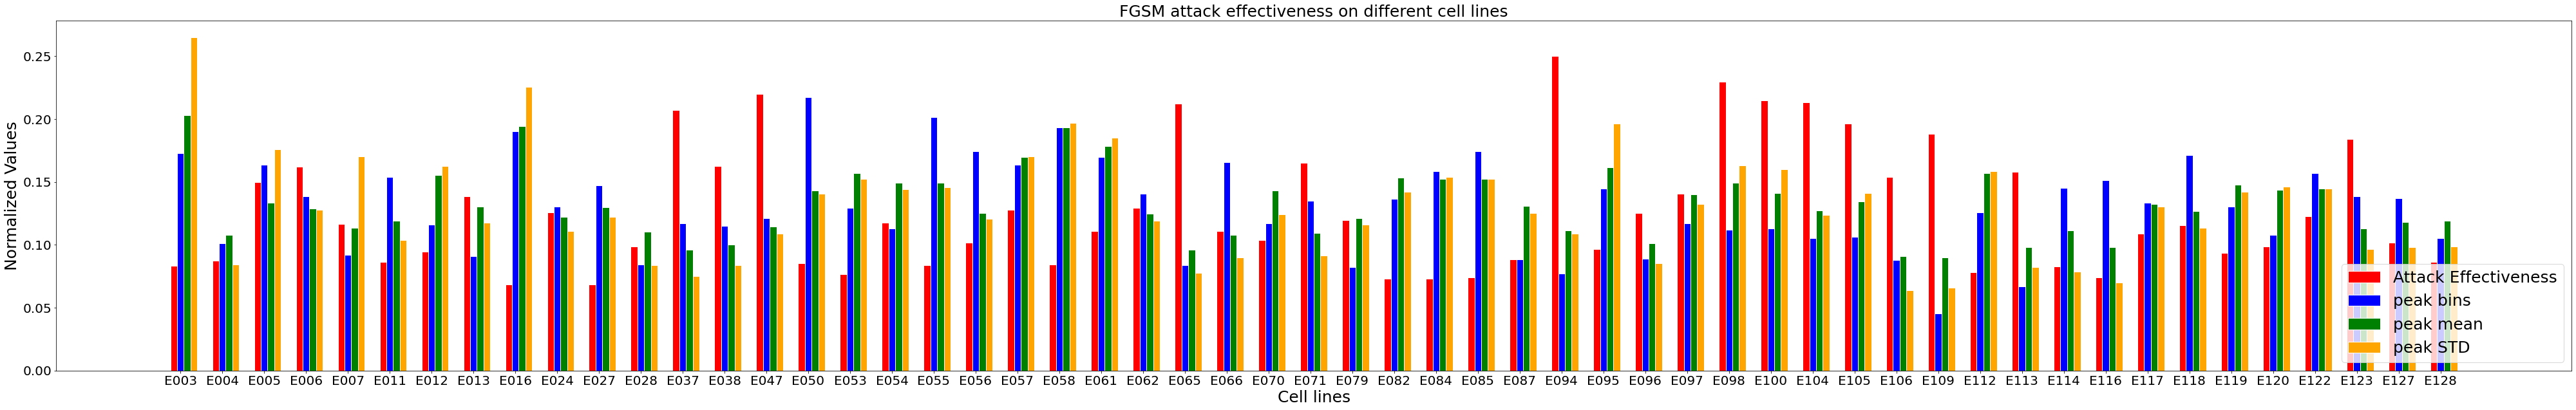

In [9]:
things_to_plot = ([normalize(atk_eff),
                   normalize(test_data_stats_df['peak bins']), 
                   normalize(test_data_stats_df['peak mean']),
                   normalize(test_data_stats_df['peak std'])
                  ])
labels_to_plot = ['Attack Effectiveness', 'peak bins', 'peak mean', 'peak STD']

cell_lines = list(os.listdir('./data/'))
cell_lines.remove('E059')
cell_lines =  np.sort(cell_lines)

barWidth = 0.8
gap = 5

plt.figure(figsize=(70, 10))
colors = ['red', 'blue', 'green', 'orange', 'pink']
for i, results in enumerate(things_to_plot):
  r = np.arange(len(results)) * gap + i * barWidth
  plt.bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels_to_plot[i], linewidth=[1 for _ in results])

plt.title('FGSM attack effectiveness on different cell lines')
plt.xlabel('Cell lines')
plt.ylabel('Normalized Values')
plt.xticks([r * gap + barWidth for r in range(len(results))], cell_lines)
plt.legend(loc='lower right')
plt.savefig('attack_effectiveness_vs_peak_stats.png')
plt.show()


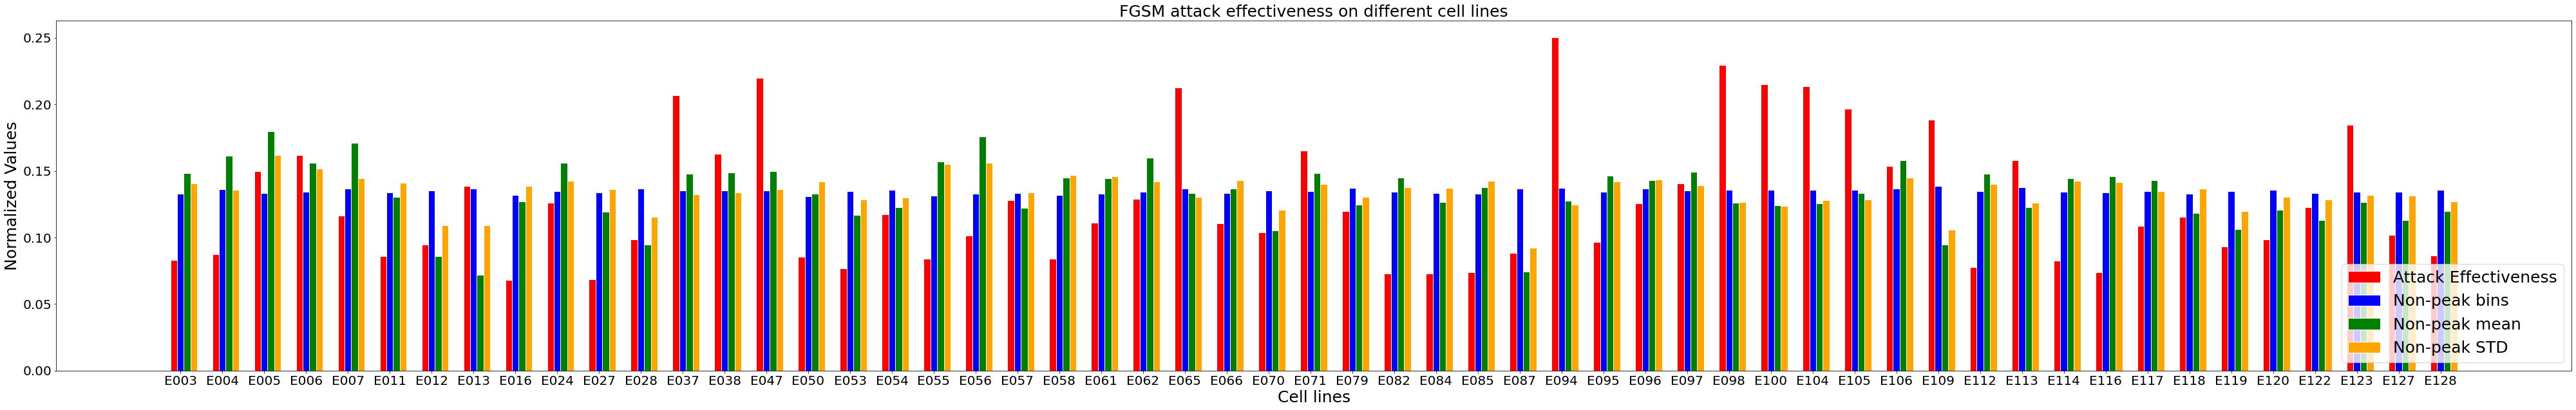

In [10]:
things_to_plot = ([normalize(atk_eff),
                   normalize(test_data_stats_df['non-peak bins']), 
                   normalize(test_data_stats_df['non-peak mean']),
                   normalize(test_data_stats_df['non-peak std'])
                  ])
labels_to_plot = ['Attack Effectiveness', 'Non-peak bins', 'Non-peak mean', 'Non-peak STD']

cell_lines = list(os.listdir('./data/'))
cell_lines.remove('E059')
cell_lines =  np.sort(cell_lines)

barWidth = 0.8
gap = 5

plt.figure(figsize=(70, 10))
colors = ['red', 'blue', 'green', 'orange', 'pink']
for i, results in enumerate(things_to_plot):
  r = np.arange(len(results)) * gap + i * barWidth
  plt.bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels_to_plot[i], linewidth=[1 for _ in results])

plt.title('FGSM attack effectiveness on different cell lines')
plt.xlabel('Cell lines')
plt.ylabel('Normalized Values')
plt.xticks([r * gap + barWidth for r in range(len(results))], cell_lines)
plt.legend(loc='lower right')
plt.savefig('attack_effectiveness_vs_non-peak_stats.png')
plt.show()


In [11]:
# Calculte Pearson's for each
def pearsonr(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  return np.sum((x - x_mean) * (y - y_mean)) / np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

for col in col_names:
    print(col, pearsonr(atk_eff,test_data_stats_df[col]))

mean -0.4550851172324908
median 0.12936020820750385
std -0.4747640945589667
peak bins -0.48356005498852317
peak mean -0.4178380079248824
peak median -0.48648575876574385
peak std -0.28963269952260384
non-peak bins 0.4835600549885233
non-peak mean 0.03807927069146112
non-peak median 0.10901364015716264
non-peak std -0.179581433724943
